### Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import data

In [4]:
# Create path
path = r'C:\Users\nanh9\Instacart Basket Analysis'

In [5]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

#### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

done

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'frequency')

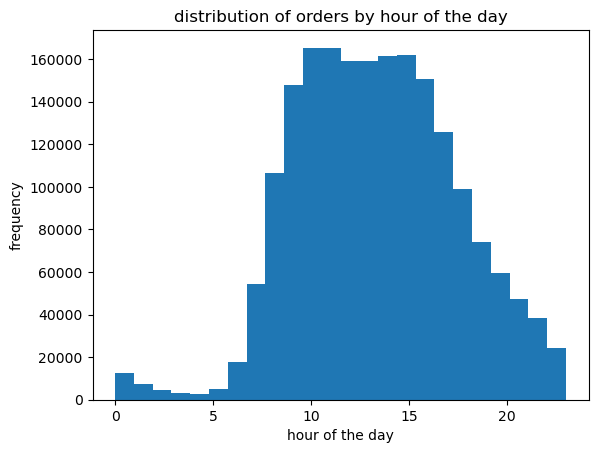

In [9]:
# Create histogram 'order_hour_of_day'
hist = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('distribution of orders by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('frequency')

busiest time is between 8am and 4pm

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag" column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953168 entries, 0 to 1953167
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   product_id             int64  
 1   product_name           object 
 2   aisle_id               int64  
 3   department_id          int64  
 4   prices                 float64
 5   order_id               int64  
 6   user_id                int64  
 7   order_number           int64  
 8   orders_day_of_week     int64  
 9   order_hour_of_day      int64  
 10  days_since_last_order  float64
 11  first_order            bool   
 12  add_to_cart_order      int64  
 13  reordered              int64  
 14  price_range_loc        object 
 15  busiest_day            object 
 16  busiest_days           object 
 17  busiest_period_of_day  object 
 18  max_order              int64  
 19  loyalty_flag           object 
 20  average_spend          float64
 21  spending_flag          object 
 22  Customer_frequency

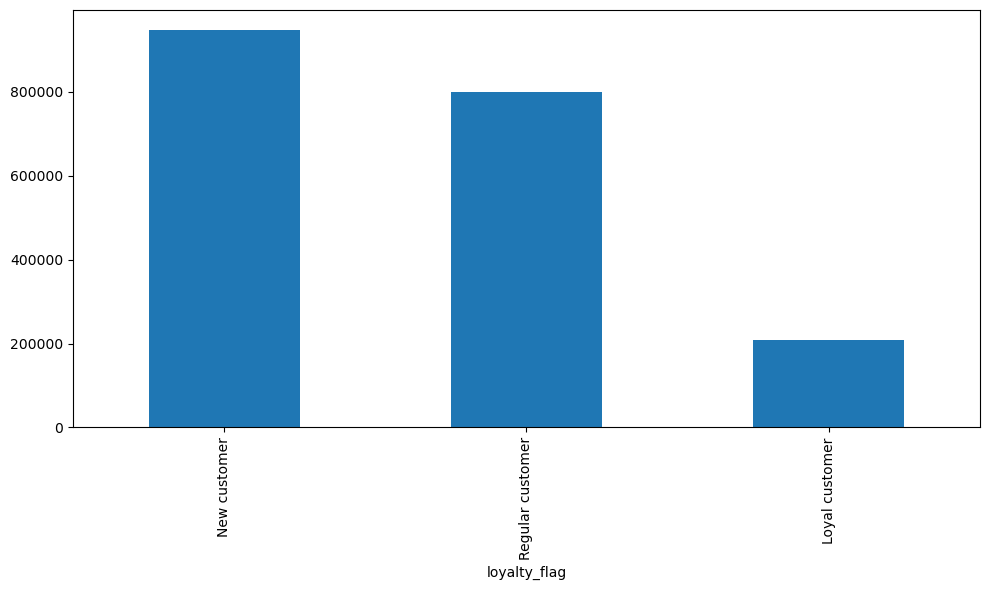

In [48]:
# Create bar chart "loyalty_flag"
bar = df['loyalty_flag'].value_counts().plot.bar()

# Adjust layout and figure size if needed
bar.figure.set_size_inches(10, 6)  # Adjust the width and height as needed
plt.tight_layout()  # Automatically adjust layout

# Save the figure using the correct reference
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bars.png'), bbox_inches='tight', dpi=300)

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [15]:
# Creating sample of dataframe
sampled_df = df.sample(n=100000, random_state=1)

In [16]:
# Group by order_hour_of_day and calculate the mean expenditure
expenditures_hours_df = sampled_df.groupby('order_hour_of_day')['prices'].mean().reset_index()

Text(0, 0.5, 'prices')

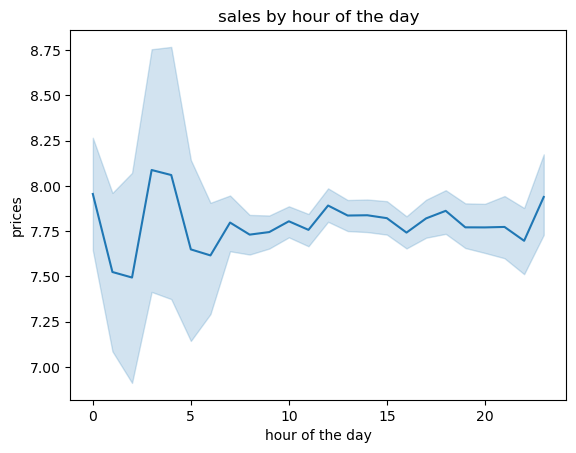

In [17]:
# Create line chart
line_prices_hour = sns.lineplot(data = sampled_df, x = 'order_hour_of_day', y = 'prices')
plt.title('sales by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('prices')

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
- In a markdown cell beneath your line chart, describe what the line chart shows.

In [19]:
# Show all columns
sampled_df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spending_flag', 'Customer_frequency',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependents_count', 'family_status', 'income'],
      dtype='object')

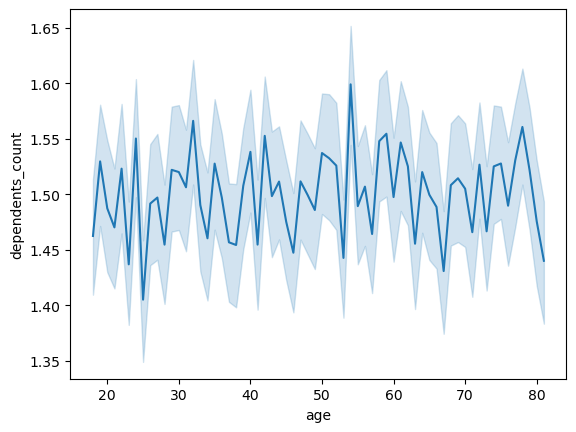

In [20]:
# Create line chart
line_age_dependentcounts = sns.lineplot(data = sampled_df, x = 'age', y = 'dependents_count')

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

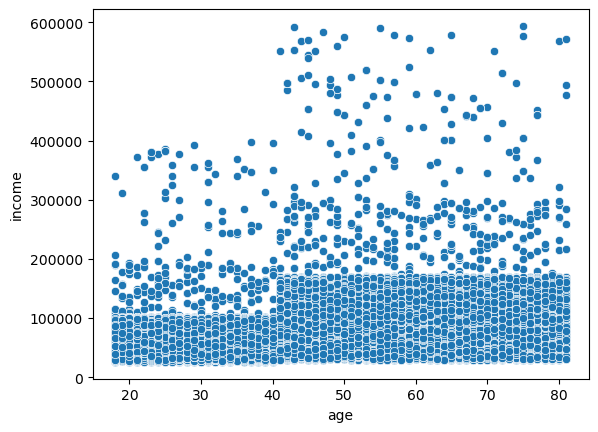

In [22]:
# Create scatterplot of 'Age' & 'Income'
scatter = sns.scatterplot(x='age', y='income', data=sampled_df)

You can see three different densities:
- high concentration: under 40 years old with income: 0-100000; 41 - 83 years with income: 100000 - 180000
- medium concentration: under 40 years old with income: 100000 - 200000; 41 - 83 years with income: 180000 - 300000
- low concentration: under 40 years old with income: 200000 - 400000; 41 - 83 years with income: 300000 - 600000

### Export data as 'png' to 'visualizations' folder

In [25]:
# Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_hour_of_day.png'))

In [50]:
# Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight', dpi=300)

In [27]:
# Line chart - prices by hour_of_the_day
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_by_hour.png'))

In [28]:
line_age_dependentcounts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependentcounts.png'))

In [29]:
# Export scatterplot - connection between age and spending power (income)
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_spending_power.png'))